### <font color='red'>**Please look at the notebook titled 'data-analysis-revised'**</font>
The dataset used here had many statiscal features, in reduce the bias I tried using a slightly different dataset with raw data

# NBA Salary Prediction
### Objective
Use NBA statistics to predict an NBA player's salary and use the residual to determine if a player was undervalued or overvalued that season

### Datasets Used:

Biometric, biographic and basic box score features from 1996 to 2020 season<br> 
https://www.kaggle.com/justinas/nba-players-data

NBA player salaries per season (2000 - 2021)<br> 
https://github.com/erikgregorywebb/datasets/blob/master/nba-salaries.csv

Every NBA team's regular season record (1946 - 2016)<br> 
https://data.world/gmoney/nba-team-records-by-year/workspace/file?filename=Historical+NBA+Performance.xlsx

Used to manually fill in team records from (2017 - 2020)<br> 
https://www.landofbasketball.com/nba_teams.htm

### Data
Based on the datasets I could find, I decided to use data between 2000 and 2020. I figured the last 20 years was good sample size since it had 2 generations of players, marked the end of the Chicago Bulls dynasty, and included all 30 teams for the most part (Charlotte Bobcats were added in 2004).

All of the data listed above was cleaned up and then imported into a Dataframe. Players who did not have their salary information were removed along with players who did not play for more than 10 games a season (teams can offer players 10-day contracts to assess their skill). Players that were traded mid-season were listed under their most recent team that year. For consistency, all data used the latter year to represent the seaon (ex: 2003-04 would be 2004).

In [1]:
import numpy as np
import matplotlib.pyplot as plt  # To visualize
import pandas as pd  # To read data
import seaborn as sns

### Features
<font color='red'>**(Red ones are used later)**</font>


Team: Used team abbreviation for simplicity<br>
Pos: Player's position<br>
<font color='red'>**GP: Games played**</font><br>
<font color='red'>**PTS: Points**</font><br>
<font color='red'>**REB: Rebounds**</font><br>
<font color='red'>**AST: Assits**</font><br>
<font color='red'>**+/-: Net changes in the score when player is either on or off the court**</font><br>
ORB%: Offensive rebound percentage<br>
DRB%: Defensive rebound percentage<br>
USG%: Usage percentage<br>
TS%: True shooting percentage<br>
AST%: Assist percentage<br>
W-L: Wins to losses ratio<br>
<font color='red'>**W-L:% Win to losses percentage (not every season was the typical 82 games)**</font><br>
TG: Total team games<br>
<font color='red'>**Cap: NBA salary cap (more on that later)**</font><br>
<font color='red'>**Cap%: Percentage of salary over league cap**</font><br>

In [2]:
df = pd.read_csv('data/final/season-data-final-edit.csv')
df

,Unnamed: 0,Name,Team,Season,Pos,Salary,Age,Height (cm),Weight (kg),GP,...,DRB%,USG%,TS%,AST%,W-L,W-L%,TG,Cap,GP%,Cap%
0,0,Michael Stewart,TOR,2000,PF,3200000,25,208.28,104.326160,42,...,0.200,0.094,0.432,0.024,45-37,0.549,82,34000000,0.512195,0.094118
1,1,Vince Carter,TOR,2000,G,2267000,23,200.66,97.522280,82,...,0.120,0.299,0.543,0.195,45-37,0.549,82,34000000,1.000000,0.066676
2,2,Dell Curry,TOR,2000,G,2100000,36,195.58,92.986360,67,...,0.099,0.207,0.542,0.141,45-37,0.549,82,34000000,0.817073,0.061765
3,4,Michael Curry,DET,2000,SF,2000000,31,195.58,102.965384,82,...,0.060,0.146,0.560,0.091,42-40,0.512,82,34000000,1.000000,0.058824
4,5,Jerry Stackhouse,DET,2000,SF,4781000,25,198.12,98.883056,82,...,0.072,0.289,0.545,0.200,42-40,0.512,82,34000000,1.000000,0.140618
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7610,8111,Thaddeus Young,CHI,2020,PF,12900000,32,203.20,106.594120,64,...,0.145,0.192,0.521,0.113,22-43,0.338,65,109140000,0.984615,0.118197
7611,8112,Tomas Satoransky,CHI,2020,SG,10000000,28,200.66,95.254320,65,...,0.101,0.165,0.533,0.269,22-43,0.338,65,109140000,1.000000,0.091625
7612,8113,Kris Dunn,CHI,2020,PG,5348007,26,190.50,92.986360,51,...,0.132,0.145,0.510,0.198,22-43,0.338,65,109140000,0.784615,0.049001
7613,8114,Lauri Markkanen,CHI,2020,PF,5300400,23,213.36,108.862080,50,...,0.174,0.209,0.560,0.077,22-43,0.338,65,109140000,0.769231,0.048565


### NBA Salary Cap
The NBA salary cap is the limit to the total amount of money that NBA teams are allowed to pay their players. The graph below shows that the salary cap has increased over the years. Given this increase, we should adjust our player salary to the salary cap that season.

<AxesSubplot:title={'center':'NBA Salary Cap (2000 - 2020)'}, xlabel='Season'>

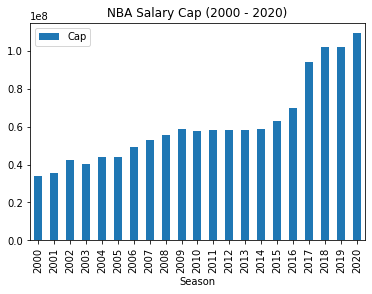

In [3]:
nba_salary_df = pd.read_csv('data/final/nba-salary-cap.csv')
nba_salary_df.plot(kind='bar', x='Season', y='Cap', title='NBA Salary Cap (2000 - 2020)')

## NBA Average Player Salary per Year
Despite the gradual increase in the salary cap, the graph below shows some irregularities. It's most likley that the majority of the early 2000's players in the data set were high-profile players. There are a few graphs online that show that the average salary gradually increased throughout the years similarly to the salry cap.
https://runrepeat.com/salary-analysis-in-the-nba-1991-2019

<AxesSubplot:title={'center':'NBA Player Salary (2000 - 2020)'}, xlabel='Season'>

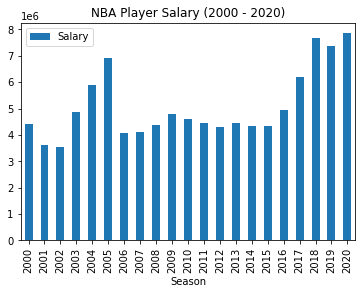

In [4]:
p_salary_df = df[['Season', 'Salary']]
p_salary_df = p_salary_df.groupby(['Season']).mean()
p_salary_df.plot(kind='bar', title='NBA Player Salary (2000 - 2020)')

If we count the number of entries per year we can that, as predicted, the early 2000's (00-05) entries are inconsistent in comparison to the following years.

<AxesSubplot:title={'center':'# of Entries per Year'}>

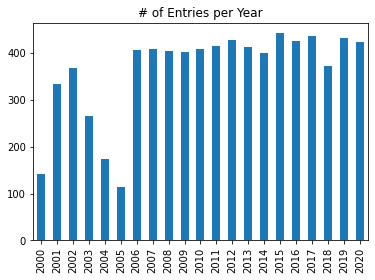

In [5]:
vc = df['Season'].value_counts().sort_index()
vc.plot.bar(title='# of Entries per Year')

## Salary & Statistics
We can use a heat map to explore the relationship between each category in our dataset. However, given the number of features it can be hard to tell which are relevant.

<AxesSubplot:>

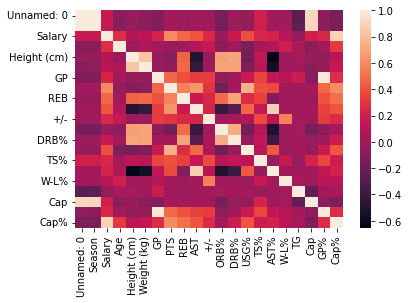

In [6]:
sns.heatmap(df.corr())

### Directly Correlated Features:
Height -> Weight

PTS -> TS%, USG%

AST -> AST%

REB -> DRB%, ORB%

GP -> GP%
### Categorical Feautres:
Season, TG

In [7]:
# take a random sample of 250 to see the data more clearly in the pairplots
sample_df = df.sample(250)

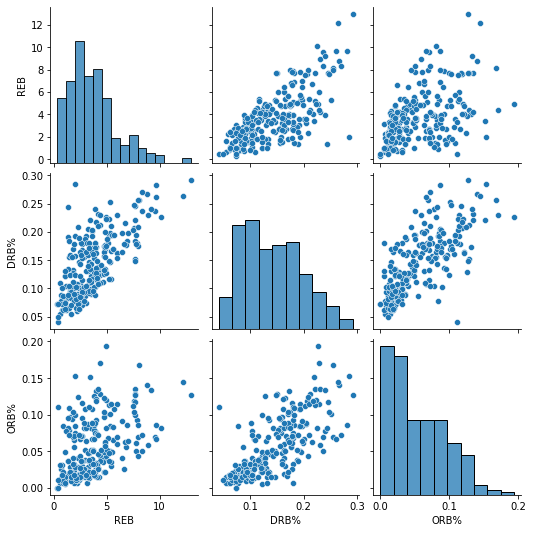

In [8]:
# example shwoing stats that are correlated
sns.pairplot(sample_df[['REB', 'DRB%', 'ORB%']])

We'll use a combination of raw data and some statistical on the basis that each is unique 

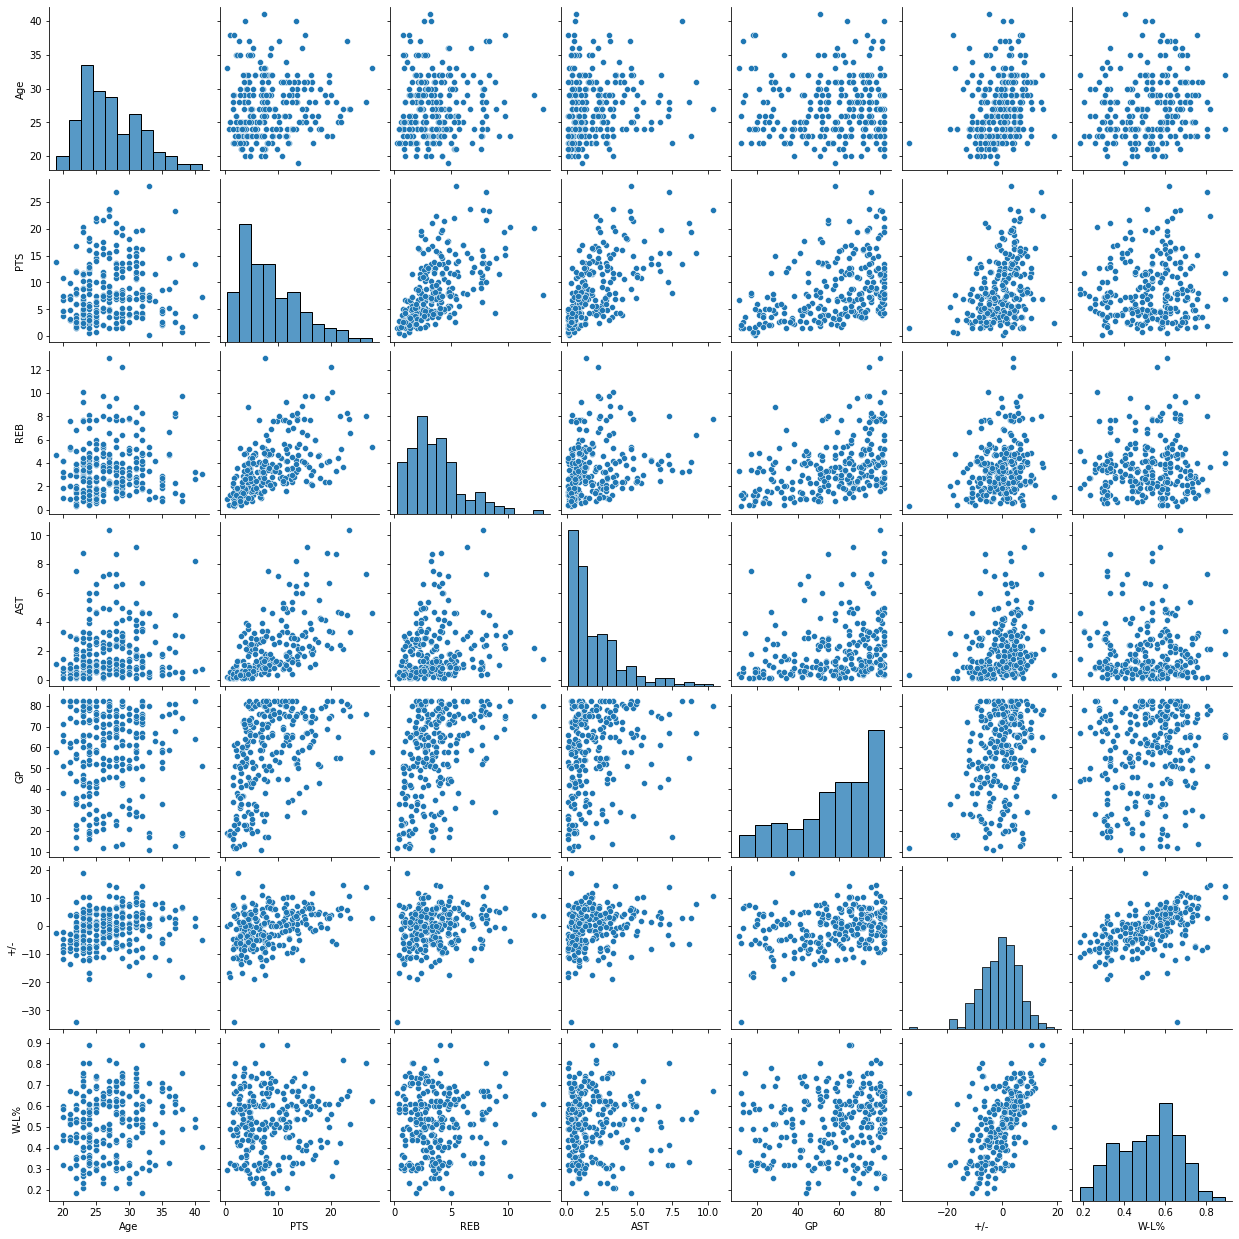

In [97]:
feat = ['Age', 'PTS', 'REB', 'AST', 'GP', '+/-', 'W-L%']
sns.pairplot(sample_df[feat])

## Training/Fitting Model
I decided to go with a Random Forest Regression because it had performed slightly better than Linear Regression. Note that one glaring problem with the result is the residual biased (seen in the 2nd graph)

In [93]:
from sklearn.ensemble import RandomForestRegressor
from sklearn import preprocessing

In [94]:
X = df[feat]
y = df[['Cap%']]

normalized_X = preprocessing.normalize(X)

model = RandomForestRegressor()
y_len = y.values.ravel().size
model.fit(X, np.ravel(y))
y_pred = model.predict(X)

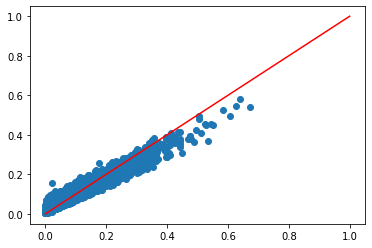

In [95]:
plt.scatter(y, y_pred.reshape(y_len,1))
plt.plot(np.array([0,1]), color='red')
plt.show()

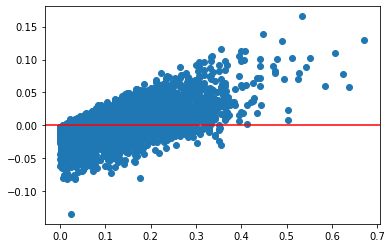

In [96]:
plt.scatter(y, y-y_pred.reshape(y_len,1))
plt.axhline(y=0, color='red')
plt.show()

In [81]:
df_pred = df
df_pred['Pred_Cap%'] = y_pred
df_pred['Residuals'] = df['Cap%'] -df['Pred_Cap%']
df_pred.to_csv('data/final/predicted-nba-data.csv')
df_pred = df_pred[['Name', 'Team', 'Season', 'Salary', 'Age', 'GP' ,'PTS', 'AST', 'REB', '+/-', 'Cap%', 'Pred_Cap%', 'Residuals']]

In [82]:
df_pred.sort_values(by='Residuals', ascending=False).head(15)

,Name,Team,Season,Salary,Age,GP,PTS,AST,REB,+/-,Cap%,Pred_Cap%,Residuals
999,Shawn Kemp,ORL,2003,21500000,33,79,6.8,0.7,5.7,-2.3,0.533883,0.357301,0.176582
1352,Shaquille O'Neal,MIA,2005,29464000,33,73,22.9,2.7,10.4,10.8,0.671621,0.523060,0.148561
496,Juwan Howard,DEN,2002,18750000,29,81,14.6,2.1,7.6,-2.3,0.441176,0.296376,0.144800
1300,Allan Houston,NYK,2005,17531000,34,20,11.9,2.1,1.2,1.5,0.399612,0.256431,0.143181
197,Hakeem Olajuwon,HOU,2001,16685000,38,58,11.9,1.2,7.4,1.1,0.470000,0.329926,0.140074
1094,Scottie Pippen,POR,2003,19727000,37,64,10.8,4.5,4.3,8.2,0.489856,0.350905,0.138951
4472,Kobe Bryant,LAL,2013,30453805,34,78,27.3,6.0,5.6,2.7,0.524668,0.386425,0.138243
3387,Tracy McGrady,NYK,2010,22843124,31,30,8.2,3.3,3.1,-9.6,0.395895,0.257683,0.138212
2964,Stephon Marbury,BOS,2009,20840625,32,23,3.8,3.3,1.2,-3.2,0.355157,0.221104,0.134053
1340,Dikembe Mutombo,HOU,2005,19684000,39,80,4.0,0.1,5.3,10.0,0.448689,0.317540,0.131149


In [83]:
df_pred.sort_values(by='Residuals', ascending=True).head(15)

,Name,Team,Season,Salary,Age,GP,PTS,AST,REB,+/-,Cap%,Pred_Cap%,Residuals
756,Michael Jordan,WAS,2002,1000000,39,60,22.9,5.2,5.7,-0.3,0.023529,0.119685,-0.096156
3031,Reggie Williams,GSW,2010,118435,23,24,15.2,2.8,4.6,-3.5,0.002053,0.097156,-0.095103
6010,Giannis Antetokounmpo,MIL,2017,2995421,22,80,22.9,5.4,8.8,1.5,0.031818,0.126008,-0.094190
7040,Pascal Siakam,TOR,2019,1544951,25,80,16.9,3.1,6.9,10.6,0.015166,0.109055,-0.093889
627,Dirk Nowitzki,DAL,2002,2157000,24,76,23.4,2.4,9.9,6.6,0.050753,0.141478,-0.090725
1854,Dwyane Wade,MIA,2007,3841443,25,51,27.4,7.5,4.7,4.3,0.072296,0.160571,-0.088275
986,Paul Pierce,BOS,2003,2793000,25,79,25.9,4.4,7.3,2.7,0.069355,0.156812,-0.087457
2449,Dwight Howard,ORL,2008,6061274,22,82,20.7,1.3,14.2,8.1,0.108957,0.194612,-0.085656
1439,Boris Diaw,PHX,2006,1174200,24,81,13.3,6.2,6.9,9.3,0.023721,0.109133,-0.085412
7323,Domantas Sabonis,IND,2020,3529555,24,62,18.5,5.0,12.4,3.1,0.032340,0.116195,-0.083855


In [84]:
df_pred.sort_values(by='Cap%', ascending=False).head(10)

,Name,Team,Season,Salary,Age,GP,PTS,AST,REB,+/-,Cap%,Pred_Cap%,Residuals
1352,Shaquille O'Neal,MIA,2005,29464000,33,73,22.9,2.7,10.4,10.8,0.671621,0.523060,0.148561
1192,Kevin Garnett,MIN,2004,28000000,28,82,24.2,5.0,13.9,10.4,0.638686,0.538550,0.100136
1037,Kevin Garnett,MIN,2003,25200000,27,82,23.0,6.0,13.4,6.8,0.625760,0.557360,0.068401
1218,Shaquille O'Neal,LAL,2004,26571000,32,67,21.5,2.9,11.5,8.3,0.606090,0.500505,0.105585
1023,Shaquille O'Neal,LAL,2003,23571000,31,67,27.5,3.1,11.1,6.9,0.585310,0.463502,0.121808
411,Kevin Garnett,MIN,2001,19600000,25,81,22.0,5.0,11.4,3.7,0.552113,0.444196,0.107916
332,Shaquille O'Neal,LAL,2001,19285000,29,74,28.7,3.7,12.7,7.9,0.543239,0.460097,0.083143
999,Shawn Kemp,ORL,2003,21500000,33,79,6.8,0.7,5.7,-2.3,0.533883,0.357301,0.176582
612,Kevin Garnett,MIN,2002,22400000,26,81,21.2,5.2,12.1,5.8,0.527059,0.449593,0.077465
4472,Kobe Bryant,LAL,2013,30453805,34,78,27.3,6.0,5.6,2.7,0.524668,0.386425,0.138243


<AxesSubplot:title={'center':'# of Entries per Year'}>

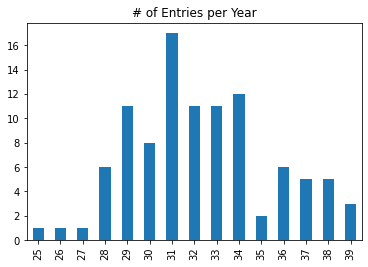

In [85]:
temp = df_pred.sort_values(by='Residuals', ascending=False)['Age'].head(100).value_counts().sort_index()
temp.plot.bar(title='# of Entries per Year')

<AxesSubplot:title={'center':'# of Entries per Year'}>

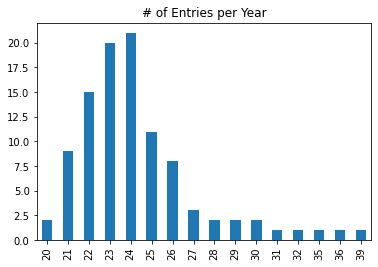

In [86]:
temp = df_pred.sort_values(by='Residuals', ascending=True)['Age'].head(100).value_counts().sort_index()
temp.plot.bar(title='# of Entries per Year')